<a href="https://colab.research.google.com/github/CodewithTanzeel/CustomerSegmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tkinter import *

In [10]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [13]:
data.shape

(200, 5)

In [14]:
print("Number of Rows: ", data.shape[0])
print("Number of Columns: ", data.shape[1])

Rows:  200
Columns:  5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [18]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [19]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
##K-means Clustering
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [26]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [27]:
from sklearn.cluster import KMeans

In [28]:
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans()

In [30]:
k_means = KMeans()
k_means.fit_predict(X)

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 1,
       5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 7, 2, 4, 2, 7, 2, 7,
       2, 7, 2, 4, 2, 7, 2, 7, 2, 4, 2, 4, 2, 4, 2, 7, 2, 4, 2, 4, 2, 7,
       2, 4, 2, 7, 2, 7, 2, 4, 2, 4, 2, 7, 2, 4, 2, 7, 2, 7, 2, 4, 2, 4,
       2, 7, 2, 4, 6, 4, 6, 4, 6, 4, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0], dtype=int32)

In [33]:
# Elbow Method to Find Optimal Number of Clusters
wcss = []
for i in range(1,11):
     k_means = KMeans(n_clusters=i)
     k_means.fit(X)
     wcss.append(k_means.inertia_)

In [34]:
wcss

[269981.28000000014,
 185930.4627192983,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37455.98455516028,
 30259.657207285458,
 25095.703209997544,
 24491.300683020672,
 19707.258979794762]

Text(0, 0.5, 'WCSS')

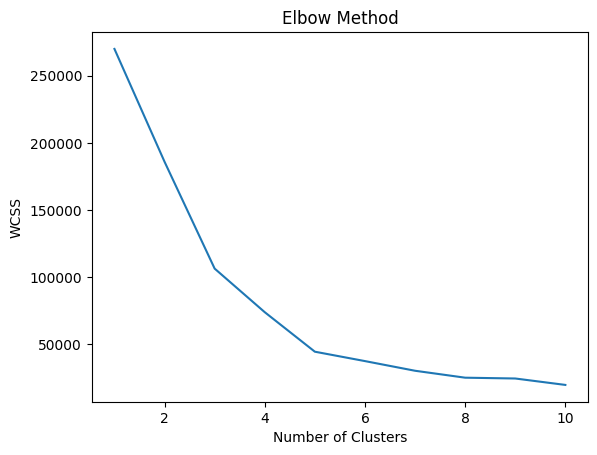

In [38]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [39]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [56]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

In [57]:
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

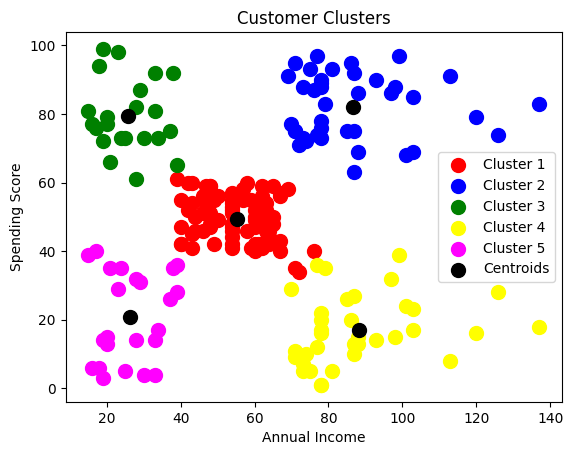

In [58]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c="red",label="Cluster 1")
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c="blue",label="Cluster 2")
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c="green",label="Cluster 3")
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c="yellow",label="Cluster 4")
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c="magenta",label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="black",label="Centroids")
plt.title("Customer Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


In [59]:
k_means.predict([[15,39]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [61]:
joblib.dump(k_means,"CustomerSegmentation") # to save the model

['CustomerSegmentation']

In [64]:
model = joblib.load("CustomerSegmentation")

In [66]:
model.predict([[15,39]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

UI


In [76]:
!pip install gradio -q

import gradio as gr
import joblib
import numpy as np


model = joblib.load("CustomerSegmentation")

def predict_cluster(annual_income, spending_score):
    features = np.array([[annual_income, spending_score]])
    cluster = model.predict(features)[0]

    descriptions = {
        0: "Customers with medium income & medium spend",
        1: "Customers with high income but low spend",
        2: "Customers with low income & low spend",
        3: "Customers with low income but high spend",
        4: "Customers with high income & high spend",
    }

    return f"Cluster {cluster}: {descriptions.get(cluster, 'Unknown cluster')}"


iface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Number(label="Annual Income (k$)", value=50),
        gr.Number(label="Spending Score (1-100)", value=50),
    ],
    outputs=gr.Textbox(label="Cluster Result"),
    title="Customer Segmentation",
    description="Enter customer annual income & spending score to find their segment."
)

iface.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://40922a3ee30ba4bc8f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
